# Churn Analytics

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Importing Algorithms

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Import Dataset

In [5]:
df = pd.read_csv(r"C:\Users\sgaks\Downloads\SNU_AI_DS\4th_sem\ML_LAB\Ex4\Telco-Customer-Churn.csv")
df1 = df.copy()

In [6]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Pre-processing data:

In [7]:
df1 = df1.drop('customerID',axis=1).copy()

In [8]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'], errors='coerce')

### Data Analysis

In [9]:
print(f"Total number of rows in dataset : {df1.shape[0]}\nTotal number of columns in dataset : {df1.shape[1]}")

Total number of rows in dataset : 7043
Total number of columns in dataset : 20


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Label Encoding

In [11]:
categorical_features = df1.select_dtypes(include='object')
categorical_features_col = categorical_features.columns

In [12]:
Label_Encoder = LabelEncoder()
for i in df1.select_dtypes(include='object').columns:
    df1[i] = Label_Encoder.fit_transform(df1[i].astype(str))

In [13]:
df1.isna().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Total Charges column have 11 null values which needs to be filled

In [14]:
df1['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
df1['TotalCharges']=df1['TotalCharges'].fillna(df1['TotalCharges'].mean())

### Data Visualisation

In [16]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot: >

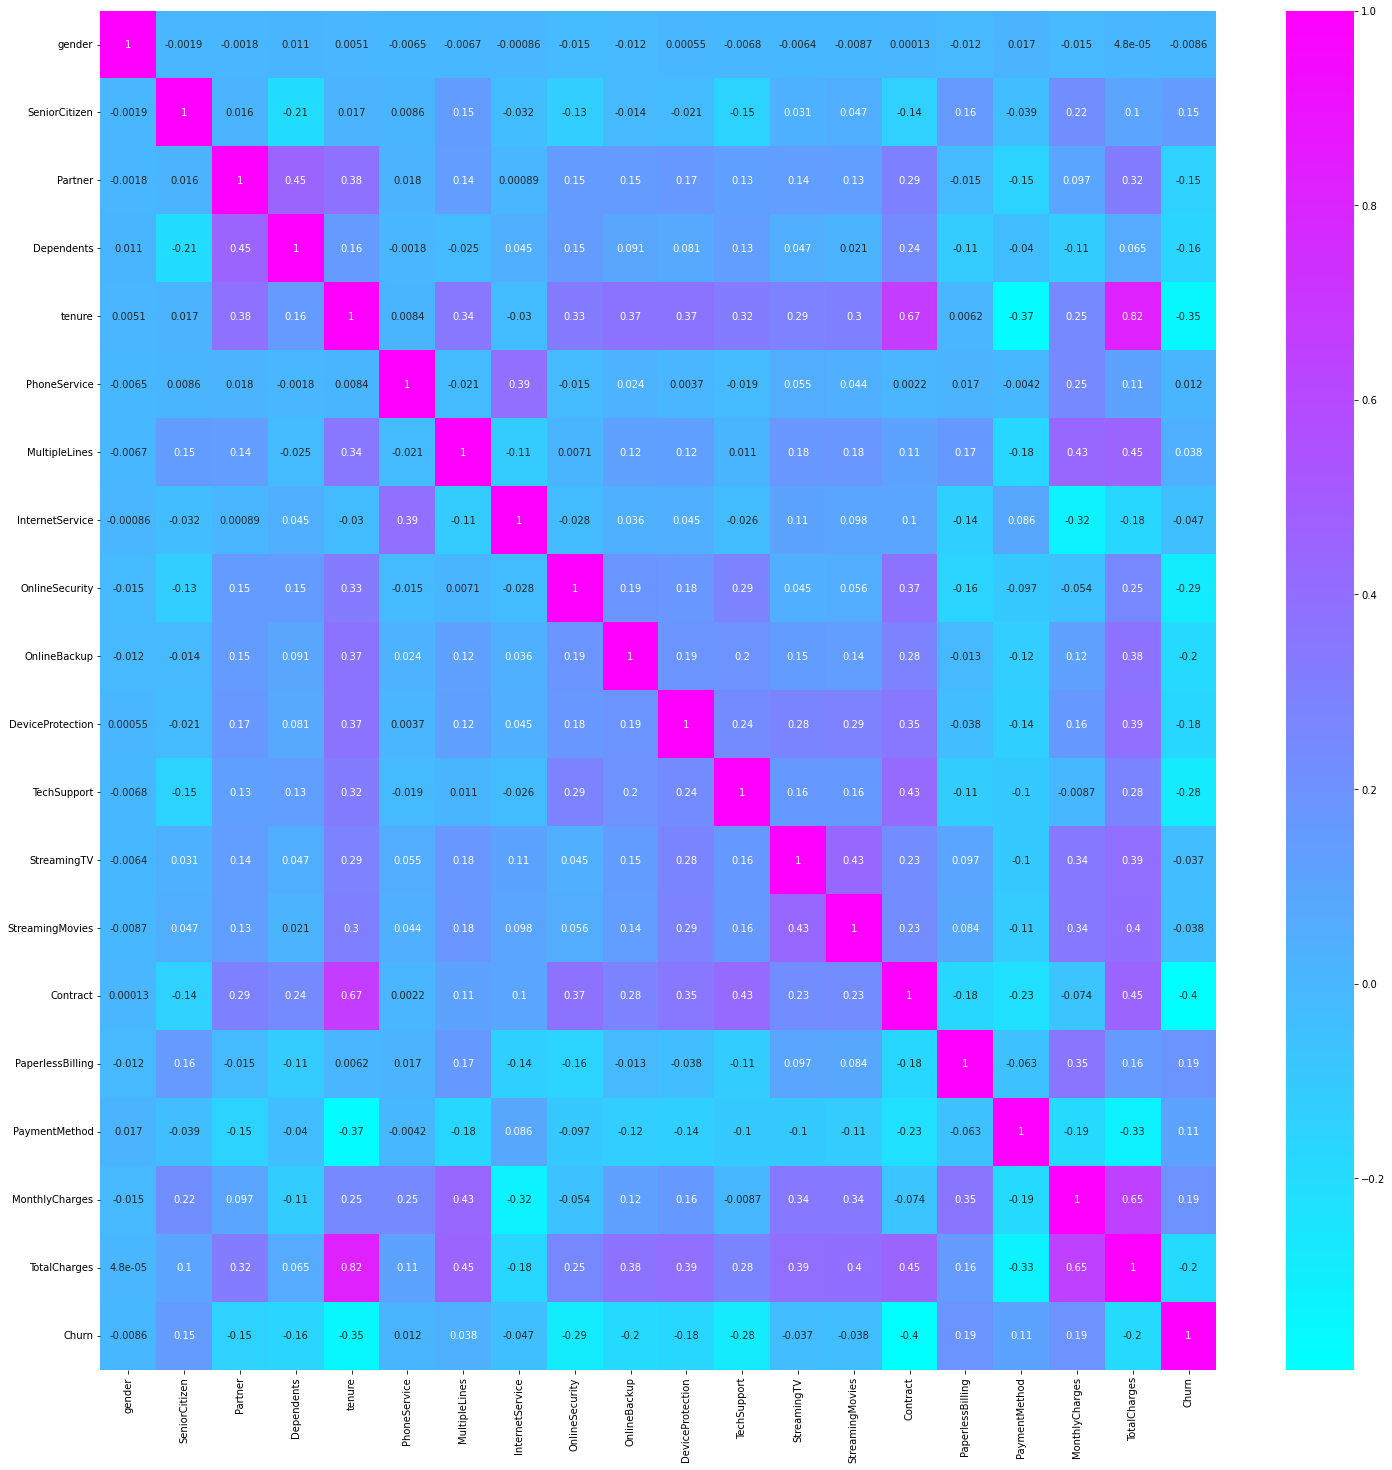

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),annot=True,cmap='cool')

### Splitting Data

In [18]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression

##### GridSearchCV

In [20]:
LR = LogisticRegression()
grid = {'C':np.logspace(-3,3,7),'penalty':['l1','l2']}
LR_cv = GridSearchCV(LR,grid,cv=10)
LR_cv.fit(x_train,y_train)##### GridSearchCV

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [21]:
print(f"Best Accuracy Score:{LR_cv.best_score_}")

Best Accuracy Score:0.7976553544209717


In [22]:
print("Best params",LR_cv.best_params_)

Best params {'C': 1.0, 'penalty': 'l2'}


##### Randomized Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV
params = {'C':np.logspace(-5,5,7),
         'penalty':['l1','l2']}
rnd_search = RandomizedSearchCV(LR,params,cv=9)
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=9, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 4.64158883e-04, 2.15443469e-02, 1.00000000e+00,
       4.64158883e+01, 2.15443469e+03, 1.00000000e+05]),
                                        'penalty': ['l1', 'l2']})

In [24]:
print(f"Best Accuracy Score:{rnd_search.best_score_}")

Best Accuracy Score:0.7957046503372383


In [25]:
print(f"Best Params:{rnd_search.best_params_}")

Best Params:{'penalty': 'l2', 'C': 1.0}


## K-Nearest Neighbour [KNN]

In [26]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]}
knn = KNeighborsClassifier()

##### GridSearch CV

In [27]:
knn_grid = GridSearchCV(knn, param_grid,scoring='accuracy', cv=10)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21]},
             scoring='accuracy')

In [28]:
print("Best parameter (k):", knn_grid.best_params_)

Best parameter (k): {'n_neighbors': 14}


In [29]:
print("Accuracy score of Best parameter (k):", knn_grid.best_score_)

Accuracy score of Best parameter (k): 0.7841587619515513


- From the all the parameter we kind that the knn algorithm works best with 14 nearest neighbour
- Now, implementing KNN algorithm with [n] as 14 

In [30]:
knn = KNeighborsClassifier(knn_grid.best_params_['n_neighbors'])
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

##### Randomized Search

In [31]:
grid = RandomizedSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=14),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21]},
                   scoring='accuracy')

In [32]:
print(f"Accuracy Score : {grid.best_score_}")

Accuracy Score : 0.7827374878752378


In [33]:
print(f"Best Parameters : {grid.best_params_['n_neighbors']}")

Best Parameters : 18


## Naive Bayes

In [34]:
a = np.random.dirichlet(np.ones(2),size=20)
params_bayes = {'priors': [i for i in a]}

##### GridSearch CV

In [35]:
clf = GaussianNB()
baiyes_grid =  GridSearchCV(clf, param_grid=params_bayes, scoring='accuracy', cv=10)
baiyes_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [array([0.87754498, 0.12245502]),
                                    array([0.44553301, 0.55446699]),
                                    array([0.46765143, 0.53234857]),
                                    array([0.83916121, 0.16083879]),
                                    array([0.87304254, 0.12695746]),
                                    array([0.21990178, 0.78009822]),
                                    array([0.78255537, 0.21744463]),
                                    array([0.89840655, 0.10159345]),
                                    array([0.16955291, 0.83044709]),
                                    array([0.07817131, 0.92182869]),
                                    array([0.64926736, 0.35073264]),
                                    array([0.37345982, 0.62654018]),
                                    array([0.43512085, 0.56487915]),
                                    array([0.59799863, 0.40200137]),
                                    array([0.50931759, 0.49068241]),
                                    array([0.09482121, 0.90517879]),
                                    array([0.96126907, 0.03873093]),
                                    array([0.8043032, 0.1956968]),
                                    array([0.54515037, 0.45484963]),
                                    array([0.03532024, 0.96467976])]},
             scoring='accuracy')

In [36]:
a = baiyes_grid.best_params_['priors']
print("Accuracy score of Best parameter (k):", baiyes_grid.best_params_)

Accuracy score of Best parameter (k): {'priors': array([0.96126907, 0.03873093])}


In [37]:
print("Best parameter (k):", baiyes_grid.best_score_)

Best parameter (k): 0.7822165954927377


- From the all the parameter, we find that the Naive Baiyes algorithm works best with array ([0.93593143, 0.06406857]
- Now, implementing Naive Baiyes algorithm with array ([0.93593143, 0.06406857] 

In [38]:
clf = GaussianNB(priors=a)

In [39]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [40]:
accuracy_score(y_test, y_pred)

0.801277501774308

##### Randomized Search CV

In [41]:
grid = RandomizedSearchCV(estimator=GaussianNB(),param_distributions=params_bayes,cv=10)
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GaussianNB(),
                   param_distributions={'priors': [array([0.87754498, 0.12245502]),
                                                   array([0.44553301, 0.55446699]),
                                                   array([0.46765143, 0.53234857]),
                                                   array([0.83916121, 0.16083879]),
                                                   array([0.87304254, 0.12695746]),
                                                   array([0.21990178, 0.78009822]),
                                                   array([0.78255537, 0.21744463]),
                                                   array([0.89840655, 0.10159345]),
                                                   array([0.16955291, 0.83044709]),
                                                   array([0.07817131, 0.92182869]),
                                                   array([0.64926736, 0.35073264]),
                                                   array([0.37345982, 0.62654018]),
                                                   array([0.43512085, 0.56487915]),
                                                   array([0.59799863, 0.40200137]),
                                                   array([0.50931759, 0.49068241]),
                                                   array([0.09482121, 0.90517879]),
                                                   array([0.96126907, 0.03873093]),
                                                   array([0.8043032, 0.1956968]),
                                                   array([0.54515037, 0.45484963]),
                                                   array([0.03532024, 0.96467976])]})

In [42]:
print(f"Best Parameters : {grid.best_params_}")

Best Parameters : {'priors': array([0.96126907, 0.03873093])}


In [43]:
print(f"Best Accuracy : {grid.best_score_}")

Best Accuracy : 0.7822165954927377


In [44]:
accuracy_score(y_test, y_pred)

0.801277501774308

## Decision Tree:

In [45]:
params_dt = {'max_features': [i for i in range(21)]}

##### Grid Search CV

In [46]:
dt = DecisionTreeClassifier()
dt_grid =  GridSearchCV(dt, param_grid=params_dt, scoring='accuracy', cv=10)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [47]:
print("Best parameter (k):", dt_grid.best_params_)

Best parameter (k): {'max_features': 14}


In [48]:
a = baiyes_grid.best_score_
print("Accuracy score of Best parameter (k):", dt_grid.best_score_)

Accuracy score of Best parameter (k): 0.7373127747754558


In [49]:
accuracy_score(y_test, y_pred)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [50]:
accuracy_score(y_test, y_pred)

0.730305180979418

In [51]:
r_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params_dt, cv=10)
r_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_features': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20]})

In [52]:
print(f"Best Parameters : {grid.best_params_}")

Best Parameters : {'priors': array([0.96126907, 0.03873093])}


In [53]:
print(f"Best Accuracy : {grid.best_score_}")

Best Accuracy : 0.7822165954927377


In [54]:
y_pred = dt.predict(x_test)

In [55]:
accuracy_score(y_test, y_pred)

0.730305180979418

## SVM

In [56]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','polynomial','gausian','linear']}

##### Grid Search CV

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   1.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   1.8s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=1, kernel=gausian;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=1, kernel=gaus

In [ ]:
print(f"Best Parameters : {grid.best_params_}")

In [ ]:
print(f"Best Accuracy : {grid.best_score_}")

##### Randomized Search CV

In [ ]:
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

In [ ]:
print(f"Best Parameters : {grid.best_params_}")

In [ ]:
print(f"Best Accuracy : {grid.best_score_}")